In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Gabo0/Desktop/Jupyter Python/Ejercicios Linkedin/base_datos_2008.csv")

In [4]:
df = df.dropna(subset=["Distance","ArrDelay"])

In [5]:
df = df[df.ArrDelay > 120]

In [6]:
df = df[df.Distance > 2000]

D:\Programas\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


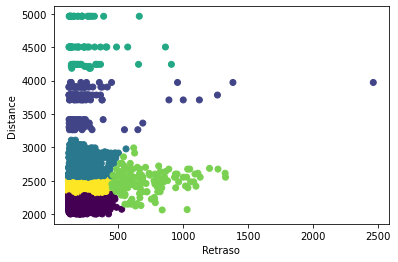

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, n_jobs=-1).fit(df[["ArrDelay","Distance"]])
plt.scatter(df["ArrDelay"],df["Distance"],c = kmeans.labels_)
plt.xlabel("Retraso")
plt.ylabel("Distance")
plt.show()

In [8]:
kmeans.cluster_centers_

array([[ 184.06769355, 2179.72355087],
       [ 253.30487805, 3660.53658537],
       [ 195.5923913 , 2632.69466403],
       [ 248.84210526, 4549.46052632],
       [ 683.4382716 , 2490.41358025],
       [ 191.20530252, 2435.46430999]])

In [9]:
df["Group"]=kmeans.labels_

In [10]:
dfgroup = df[df["Group"] == 5]

In [11]:
dfgroup.groupby(["DayOfWeek"])["DepDelay"].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,370.0,182.659459,78.711078,-4.0,137.0,170.0,216.00,442.0
2,333.0,150.708709,84.312399,-9.0,108.0,155.0,199.00,376.0
3,402.0,170.776119,84.686540,-8.0,123.0,159.0,211.75,472.0
4,372.0,172.206989,80.802729,-6.0,126.0,159.0,216.25,455.0
5,500.0,176.454000,80.806009,-3.0,127.0,164.0,213.00,422.0
6,417.0,179.107914,78.268309,-6.0,137.0,170.0,214.00,439.0
7,548.0,170.583942,87.315909,-8.0,119.0,163.0,214.75,444.0


# MODELIZACIÓN

In [12]:
dfgroup.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Group'],
      dtype='object')

In [14]:
dfgroup["Month"] = dfgroup["Month"].apply(str)
dfgroup["DayofMonth"] = dfgroup["DayofMonth"].apply(str)
dfgroup["DayofWeek"] = dfgroup["DayOfWeek"].apply(str)

x = pd.get_dummies(dfgroup[['Month','DayofMonth','DayOfWeek','UniqueCarrier','Origin','Dest']])

x = x.add(dfgroup[['TaxiIn','TaxiOut','DepTime']], fill_value=0)

<ipython-input-14-1ffae2359d02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgroup["Month"] = dfgroup["Month"].apply(str)
<ipython-input-14-1ffae2359d02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgroup["DayofMonth"] = dfgroup["DayofMonth"].apply(str)
<ipython-input-14-1ffae2359d02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [15]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=1000,n_jobs=-1).fit(x,dfgroup["ArrDelay"])
importance = clf.feature_importances_

In [16]:
importance

array([3.73720903e-02, 4.37145232e-03, 6.52894109e-03, 2.60630015e-03,
       4.99016146e-03, 4.36991801e-03, 8.55463484e-03, 2.55175606e-03,
       3.16764964e-03, 5.47549988e-03, 3.82094010e-03, 4.47324885e-03,
       4.51816390e-03, 4.64431265e-03, 6.52887183e-03, 5.30091013e-03,
       6.29448772e-03, 6.76752178e-03, 5.25610926e-03, 2.61806477e-03,
       7.65911688e-03, 8.63025845e-03, 2.39738300e-03, 1.49239601e-03,
       2.82072287e-03, 1.51650286e-03, 7.67798217e-03, 5.36585368e-03,
       4.33225600e-03, 4.43584397e-03, 4.22665459e-03, 2.93789093e-03,
       2.24312637e-01, 4.79160568e-04, 3.97420081e-05, 2.71163859e-03,
       2.45052213e-03, 1.92927031e-03, 5.06336458e-03, 1.39266870e-04,
       4.27547062e-03, 2.27769545e-03, 4.83430719e-05, 5.36553197e-03,
       5.68466368e-03, 1.03124069e-02, 6.31098821e-03, 3.39130871e-03,
       2.29937906e-02, 1.35114481e-03, 3.16270966e-03, 3.95487387e-04,
       2.29084017e-04, 2.02556126e-03, 4.25511953e-03, 1.15128995e-03,
      

In [17]:
x.columns[importance == max(importance)]

Index(['DepTime'], dtype='object')

In [19]:
np.corrcoef(dfgroup["DepTime"], dfgroup["ArrDelay"])

array([[1.        , 0.03934702],
       [0.03934702, 1.        ]])